# An intuitive guide to differencing time series in Python

## Setup

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading the data

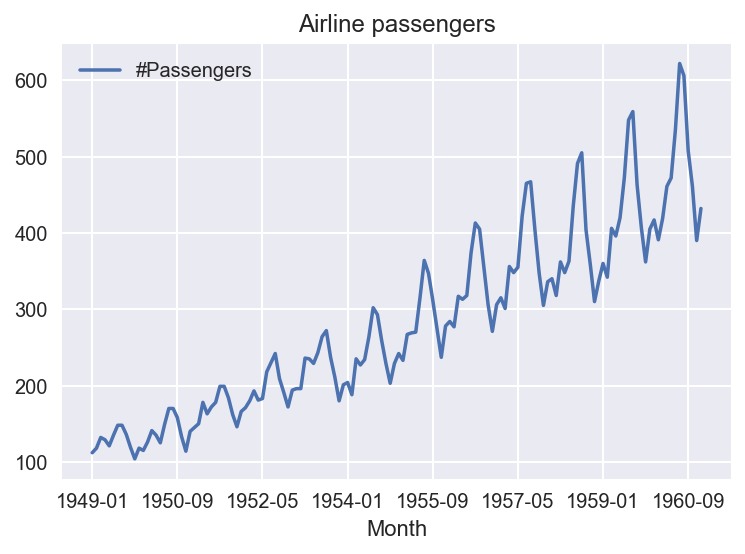

In [3]:
df = pd.read_csv('data/air_passengers.csv', index_col=0)
df.plot(title='Airline passengers');

## Differencing

In [4]:
df['diff_1'] = df['#Passengers'].diff()
df['diff_2'] = df['#Passengers'].diff(periods=2)
df

,#Passengers,diff_1,diff_2
Month,,,
1949-01,112,NaN,NaN
1949-02,118,6.0,NaN
1949-03,132,14.0,20.0
1949-04,129,-3.0,11.0
1949-05,121,-8.0,-11.0
...,...,...,...
1960-08,606,-16.0,71.0
1960-09,508,-98.0,-114.0
1960-10,461,-47.0,-145.0


## Recursive differencing

In [5]:
df['diff_o1'] = np.append(np.nan, np.diff(df['#Passengers']))
df['diff_o2'] = np.append([np.nan] * 2, np.diff(df['#Passengers'], n=2))
df

,#Passengers,diff_1,diff_2,diff_o1,diff_o2
Month,,,,,
1949-01,112,NaN,NaN,NaN,NaN
1949-02,118,6.0,NaN,6.0,NaN
1949-03,132,14.0,20.0,14.0,8.0
1949-04,129,-3.0,11.0,-3.0,-17.0
1949-05,121,-8.0,-11.0,-8.0,-5.0
...,...,...,...,...,...
1960-08,606,-16.0,71.0,-16.0,-103.0
1960-09,508,-98.0,-114.0,-98.0,-82.0
1960-10,461,-47.0,-145.0,-47.0,51.0
